# Module 7 Project -Task 3

Author: [Hayley Massey](https://github.com/HMas522)
Repository: [datafun-datafun-07-ml-predictive](https://github.com/HMas522/datafun-07-ml-predictive)

# Section 1 - Simple Linear Plot

In [1]:
#import
import pandas as pd

In [2]:
#Set up F to C conversion
c = lambda f: 5 / 9 * (f-32)

#define temperature 
temps = [(f, c(f)) for f in range(0, 101, 10)]

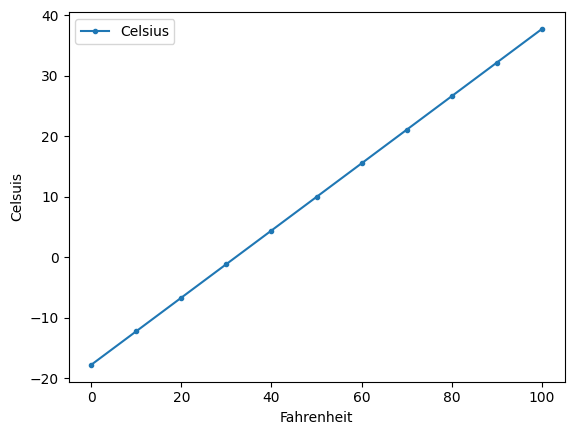

In [3]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsuis')

# Section 2 - Reading and Preparing the Data

In [12]:
#import and read the file
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [14]:
#Call the first 10 rows to verify csv was read correctly
nyc.head(10)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [15]:
#Clean the Data
nyc.columns = ['Date', 'Temperature', 'Anomaly']

#Call to confirm change worked
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [16]:
#Clean data part 2 - remove 01(Jan) from the year
#It is know this is for one month only
nyc.Date = nyc.Date.floordiv(100)

#Call to verify removal of 01
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Section 3 - Basic Descriptive Statistics 

In [36]:
#Clean up precision and call stats
pd.set_option('display.precision', 2)
nyc.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


# Section 4.1 - Find slope & y-int for Prediciton

In [19]:
#after installing scipy package, import
from scipy import stats

In [22]:
#Call slope
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [23]:
#Call y-int
linear_regression.intercept

8.694993233674289

# Section 4.2 - Predict Future date of Jan 2026

In [27]:
#Call 2026 Temperature
linear_regression.slope*2026 + linear_regression.intercept

38.62177088906374

# Section 5 - Plot Data & Find Line of Best Fit

In [47]:
#import
import seaborn as sns

import matplotlib.pyplot as plt

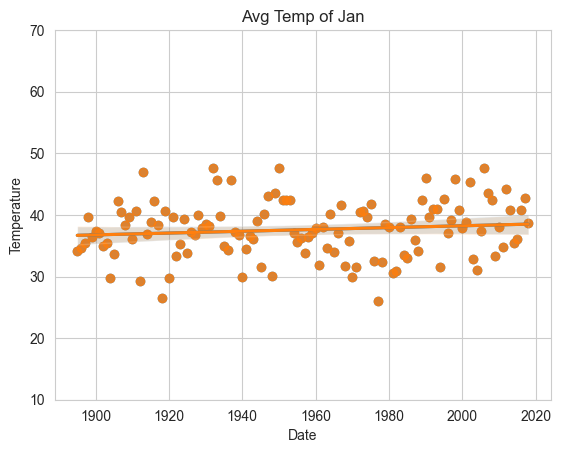

In [58]:
#Set up scatter plot & line of best fit
sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)

axes = sns.regplot(x = nyc.Date, y = nyc.Temperature) .set_title('Avg Temp of Jan')
plt.show()

